# Prediction

In [1]:
from matplotlib import pyplot as plt
import forward_prop

def make_prediction(X, weights_and_biases):
    params = forward_prop.forward_prop(X, weights_and_biases)
    predictions = forward_prop.get_predictions(params[1][1])
    return predictions

def test_prediction(index, X, Y, weights_and_biases):
    current_image = X[:, index, None]
    prediction = make_prediction(current_image, weights_and_biases)
    label = Y[index]
    return current_image, prediction, label

def plot_prediction(index, X, Y, weights_and_biases):
    current_image, prediction, label = test_prediction(index, X, Y, weights_and_biases)
    print(f'Prediction: {prediction}')
    print(f'Label: {label}')

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def test_accuracy(X, Y, weights_and_biases):
    correct_prediction = 0
    if X.shape[1] == 0:
        return correct_prediction
    for index in range(X.shape[1]):
        _, prediction, label = test_prediction(index, X, Y, weights_and_biases)
        if prediction[0] == label:
            correct_prediction += 1
    return (correct_prediction / X.shape[1]) * 100


# Test

Test accuracy: 88.75%
Prediction: [0]
Label: 0


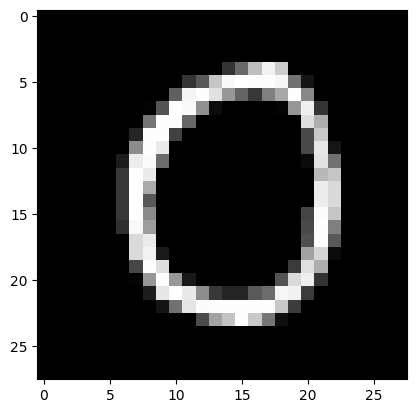

In [2]:
import numpy as np
import os
import pandas as pd

mnist_test = pd.read_csv(os.path.join('data', 'mnist_test.csv'))
mnist_test = np.array(mnist_test)

data_test = mnist_test.T
Y_test = data_test[0]
X_test = data_test[1: mnist_test.shape[1]] / 255

weights_and_biases = []
loaded_data = np.load(os.path.join('bin', 'trained_params.npz'))
for i in range(2):
    W = loaded_data[f'W{i}']
    b = loaded_data[f'b{i}']
    weights_and_biases.append((W, b))

print(f'Test accuracy: {test_accuracy(X_test, Y_test, weights_and_biases)}%')
plot_prediction(np.random.randint(0, 1000), X_test, Y_test, weights_and_biases)